# Handwritten number classification

This exercise uses ML algorithms to classify handwritten numbers. This exercise uses the popular MNIST dataset.

In [3]:
# The sklearn package has some useful methods to fetch many different datasets.
# By default, these are stored in $HOME/scikit_learn_data/
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', parser='auto')


In [13]:
print(mnist.DESCR)

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

In [14]:
mnist.details

{'id': '554',
 'name': 'mnist_784',
 'version': '1',
 'description_version': '1',
 'format': 'ARFF',
 'creator': ['Yann LeCun', 'Corinna Cortes', 'Christopher J.C. Burges'],
 'upload_date': '2014-09-29T03:28:38',
 'language': 'English',
 'licence': 'Public',
 'url': 'https://api.openml.org/data/v1/download/52667/mnist_784.arff',
 'parquet_url': 'http://openml1.win.tue.nl/dataset554/dataset_554.pq',
 'file_id': '52667',
 'default_target_attribute': 'class',
 'tag': ['AzurePilot',
  'OpenML-CC18',
  'OpenML100',
  'study_1',
  'study_123',
  'study_41',
  'study_99',
  'vision'],
 'visibility': 'public',
 'minio_url': 'http://openml1.win.tue.nl/dataset554/dataset_554.pq',
 'status': 'active',
 'processing_date': '2020-11-20 20:12:09',
 'md5_checksum': '0298d579eb1b86163de7723944c7e495'}

In [30]:
X,Y = mnist.data, mnist.target

In [21]:
# This is the data.
# One row per instance and one column per feature.
X.shape

(70000, 784)

- there are 70k images with 784 pixels each
- $28 \times 28 = 784$ pixels
- resolution = 28x28 pixels

In [22]:
Y.shape

(70000,)

- the `target` attribute contains an array on labels
- it has the same number of rows

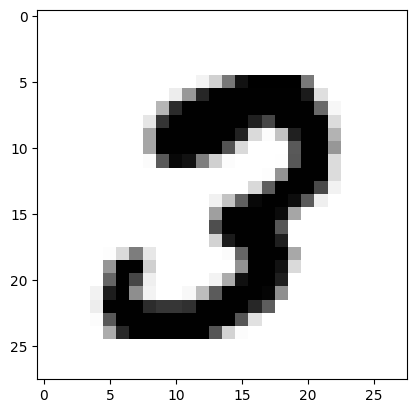

In [40]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

digit = np.array(X.iloc[12345]).reshape(28, 28)

plt.imshow(digit, cmap=matplotlib.cm.binary)

# Split test and validation data

Its important to split the data into a test and a training dataset. The first 60k images will ne used for training and the last 10k for validation.

In [43]:
X_train, X_validation = X.iloc[:60_000], X.iloc[60_000:]
Y_train, Y_validation = Y.iloc[:60_000], Y.iloc[60_000:]

# Delete the old datasets in order to prevent me from using them accidentally
del X, Y